## Building the whole pipeline in bits !! ##

In [2]:
import numpy as np

In [3]:
# pip install nnfs

### Layer Construction ###

In [4]:
class Dense:
    def __init__(self,inputs,neurons):
        self.weights = 0.01* np.random.randn(inputs,neurons)
        self.bias = np.zeros((1,neurons))

    def forward_prop(self,inputs):
        self.inputs = inputs
        self.output = np.dot(inputs,self.weights)+ self.bias

    def backward_prop(self,dvalues):
        self.dweights = np.dot(self.inputs.T,dvalues)
        self.dbiases = np.sum(dvalues,axis=0,keepdims=True)
        self.dinputs = np.dot(dvalues,self.weights.T)

### Activation Function ###

In [5]:
class activateReLu:
    def forward_pass(self,inputs):
        self.inputs = inputs
        self.output = np.maximum(0,inputs)
    def backward_pass(self,dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

In [6]:
class activateSoftmax:
    def forward_pass(self,inputs):
        expVals = np.exp(inputs - np.max(inputs,axis=1,keepdims=True))
        probs = expVals / np.sum(expVals,axis=1,keepdims=True)
        self.output = probs

### Loss Function ###

In [7]:
class Loss:
    def lossCal(self,output,y):
        sample_losses = self.forward_pass(output,y)
        data_loss = np.mean(sample_losses)

        return data_loss

In [8]:
class CategoricalCrossEntropyFunc(Loss) :
    def forward_pass(self,y_pred,y_true):
        samples = len(y_pred)
        y_pred_clip = np.clip(y_pred,1e-7,1-1e-7)

        if len(y_true.shape) ==1:
            correct_confidence = y_pred_clip[range(samples),y_true]

        elif len(y_true.shape) == 2:
            correct_confidence = np.sum(y_true*y_pred_clip,axis=1)

        neg_likelihoods = -np.log(correct_confidence)
        return neg_likelihoods


    def backward_prop(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])

        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        self.dinputs = -y_true/dvalues
        self.dinputs = self.dinputs/samples

In [9]:
class Softmax_Categorical_Loss():
    def __init__(self):
        self.activation = activateSoftmax()
        self.loss = CategoricalCrossEntropyFunc()

    def forward_prop(self, inputs, y_true):
        self.activation.forward_pass(inputs)
        self.output = self.activation.output

        return self.loss.lossCal(self.output,y_true)

    def backward_prop(self,dvalues,y_true):
        samples = len(dvalues)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), y_true] -= 1
        self.dinputs = self.dinputs / samples

### Final Testing on Data !!! ###

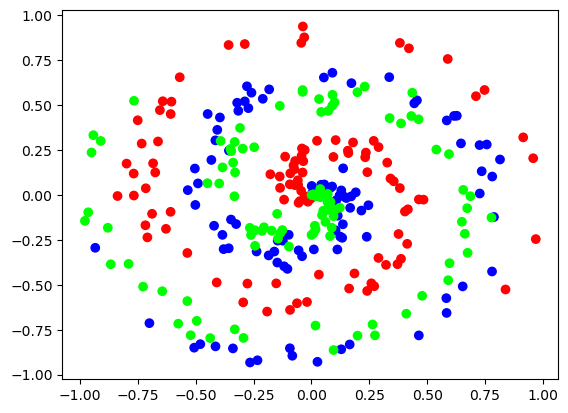

In [10]:
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
nnfs.init()

X,y = spiral_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

In [11]:
"""X,y = spiral_data(samples=100, classes=3)
layer1 = Dense(2,3)
activation_layer_1 = activateReLu()

layer2 = Dense(3,3)
loss_activation = Softmax_Categorical_Loss()

layer1.forward_prop(X)
activation_layer_1.forward_pass(layer1.output)

layer2.forward_prop(activation_layer_1.output)

loss = loss_activation.forward_prop(layer2.output,y)

print("### Results before forward propagation ###")
print(loss_activation.output[:5])

print("Loss : ", loss)

preds = np.argmax(loss_activation.output, axis=1)
# print(preds)
if len(y.shape) == 2:
    y = np.argmax(y,axis=1)
# print(y)

acc = np.mean(preds == y)
print("Accuracy : ", acc)

loss_back = loss_activation.backward_prop(loss_activation.output,y)
layer2.backward_prop(loss_activation.dinputs)
activation_layer_1.backward_pass(layer2.dinputs)
layer1.backward_prop(activation_layer_1.dinputs)
print("### Results before backward propagation ###")
# Print gradients
print(layer1.dweights)
print(layer1.dbiases)
print(layer2.dweights)
print(layer2.dbiases)
"""

'X,y = spiral_data(samples=100, classes=3)\nlayer1 = Dense(2,3)\nactivation_layer_1 = activateReLu()\n\nlayer2 = Dense(3,3)\nloss_activation = Softmax_Categorical_Loss()\n\nlayer1.forward_prop(X)\nactivation_layer_1.forward_pass(layer1.output)\n\nlayer2.forward_prop(activation_layer_1.output)\n\nloss = loss_activation.forward_prop(layer2.output,y)\n\nprint("### Results before forward propagation ###")\nprint(loss_activation.output[:5])\n\nprint("Loss : ", loss)\n\npreds = np.argmax(loss_activation.output, axis=1)\n# print(preds)\nif len(y.shape) == 2:\n    y = np.argmax(y,axis=1)\n# print(y)\n\nacc = np.mean(preds == y)\nprint("Accuracy : ", acc)\n\nloss_back = loss_activation.backward_prop(loss_activation.output,y)\nlayer2.backward_prop(loss_activation.dinputs)\nactivation_layer_1.backward_pass(layer2.dinputs)\nlayer1.backward_prop(activation_layer_1.dinputs)\nprint("### Results before backward propagation ###")\n# Print gradients\nprint(layer1.dweights)\nprint(layer1.dbiases)\nprint(

In [12]:
# print(preds)

### Building the Optimizer ###

In [13]:
class Optimizer_GD:
    def __init__(self,learning_rate=0.09):
        self.learning_rate = learning_rate

    def update_params(self,layer):
        layer.weights += -self.learning_rate*layer.dweights
        layer.bias += -self.learning_rate*layer.dbiases

epoch: 0, acc: 0.343, loss: 1.099
epoch: 100, acc: 0.433, loss: 1.098
epoch: 200, acc: 0.420, loss: 1.098
epoch: 300, acc: 0.420, loss: 1.098
epoch: 400, acc: 0.417, loss: 1.097
epoch: 500, acc: 0.410, loss: 1.096
epoch: 600, acc: 0.407, loss: 1.095
epoch: 700, acc: 0.407, loss: 1.092
epoch: 800, acc: 0.417, loss: 1.088
epoch: 900, acc: 0.420, loss: 1.085
epoch: 1000, acc: 0.420, loss: 1.081
epoch: 1100, acc: 0.423, loss: 1.079
epoch: 1200, acc: 0.440, loss: 1.077
epoch: 1300, acc: 0.440, loss: 1.076
epoch: 1400, acc: 0.440, loss: 1.076
epoch: 1500, acc: 0.443, loss: 1.075
epoch: 1600, acc: 0.453, loss: 1.075
epoch: 1700, acc: 0.463, loss: 1.074
epoch: 1800, acc: 0.470, loss: 1.074
epoch: 1900, acc: 0.467, loss: 1.073
epoch: 2000, acc: 0.467, loss: 1.073
epoch: 2100, acc: 0.460, loss: 1.072
epoch: 2200, acc: 0.460, loss: 1.072
epoch: 2300, acc: 0.453, loss: 1.072
epoch: 2400, acc: 0.457, loss: 1.071
epoch: 2500, acc: 0.453, loss: 1.071
epoch: 2600, acc: 0.453, loss: 1.071
epoch: 2700, 

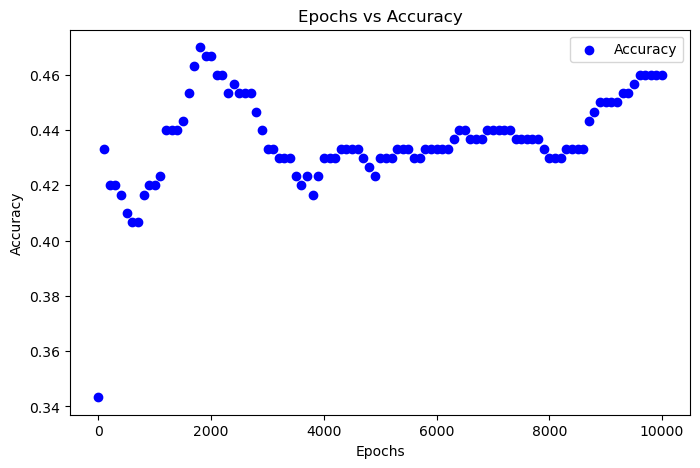

In [14]:
X,y = spiral_data(samples=100, classes=3)
layer1 = Dense(2,64)
activation_layer_1 = activateReLu()

layer2 = Dense(64,3)
loss_activation = Softmax_Categorical_Loss()
optim = Optimizer_GD()

epochs = []
accuracies = []
for epoch in range (10001):
    layer1.forward_prop(X)
    activation_layer_1.forward_pass(layer1.output)
    
    layer2.forward_prop(activation_layer_1.output)
    
    loss = loss_activation.forward_prop(layer2.output,y)
    
    # print("### Results before forward propagation ###")
    # print(loss_activation.output[:5])
    
    
    
    preds = np.argmax(loss_activation.output, axis=1)
    # print(preds)
    if len(y.shape) == 2:
        y = np.argmax(y,axis=1)
    # print(y)
    
    acc = np.mean(preds == y)
    # print("Accuracy : ", acc)
    if not epoch %100:
        print(f'epoch: {epoch}, ' +
              f'acc: {acc:.3f}, ' +
              f'loss: {loss:.3f}')
        epochs.append(epoch)
        accuracies.append(acc)
    loss_activation.backward_prop(loss_activation.output,y)
    layer2.backward_prop(loss_activation.dinputs)
    activation_layer_1.backward_pass(layer2.dinputs)
    layer1.backward_prop(activation_layer_1.dinputs)

    optim.update_params(layer1)
    optim.update_params(layer2)
# print("### Results before backward propagation ###")
# Print gradients
# print(layer1.dweights)
# print(layer1.dbiases)
# print(layer2.dweights)
# print(layer2.dbiases)

plt.figure(figsize=(8, 5))
plt.scatter(epochs, accuracies, color='blue', label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.legend()
plt.show()

### Learning Rate Decay ###

In [15]:
class Optimizer_GD:
    def __init__(self,learning_rate=0.0, decay= 0.0):
        self.learning_rate = learning_rate
        self.decay = decay
        self.curr_learning_rate = learning_rate
        self.iterations = 0 

    def pre_update_params(self):
        if self.decay:
            self.curr_learning_rate = self.learning_rate * (1.0/(1+self.decay*self.iterations))
    def update_params(self,layer):
        layer.weights += -self.curr_learning_rate*layer.dweights
        layer.bias += -self.curr_learning_rate*layer.dbiases

    def post_update_params(self):
        self.iterations +=1

epoch: 0, acc: 0.390, loss: 1.099,lr: 2.0
epoch: 100, acc: 0.403, loss: 1.078,lr: 1.8198362147406735
epoch: 200, acc: 0.423, loss: 1.076,lr: 1.6680567139282734
epoch: 300, acc: 0.420, loss: 1.073,lr: 1.539645881447267
epoch: 400, acc: 0.413, loss: 1.063,lr: 1.4295925661186561
epoch: 500, acc: 0.407, loss: 1.047,lr: 1.33422281521014
epoch: 600, acc: 0.403, loss: 1.020,lr: 1.2507817385866167
epoch: 700, acc: 0.447, loss: 0.996,lr: 1.1771630370806356
epoch: 800, acc: 0.447, loss: 0.981,lr: 1.1117287381878822
epoch: 900, acc: 0.460, loss: 0.969,lr: 1.05318588730911
epoch: 1000, acc: 0.473, loss: 0.959,lr: 1.0005002501250624
epoch: 1100, acc: 0.483, loss: 0.950,lr: 0.9528346831824678
epoch: 1200, acc: 0.497, loss: 0.939,lr: 0.9095043201455207
epoch: 1300, acc: 0.500, loss: 0.929,lr: 0.8699434536755111
epoch: 1400, acc: 0.510, loss: 0.926,lr: 0.8336807002917882
epoch: 1500, acc: 0.523, loss: 0.906,lr: 0.8003201280512204
epoch: 1600, acc: 0.543, loss: 0.907,lr: 0.7695267410542516
epoch: 1700,

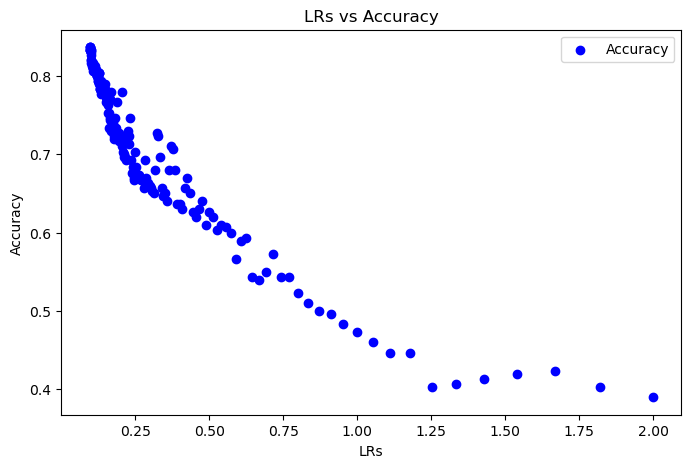

In [16]:
X,y = spiral_data(samples=100, classes=3)
layer1 = Dense(2,64)
activation_layer_1 = activateReLu()

layer2 = Dense(64,3)
loss_activation = Softmax_Categorical_Loss()
optim = Optimizer_GD(learning_rate=2.0,decay=1e-3)

lrs = []
accuracies = []
for epoch in range (20001):
    layer1.forward_prop(X)
    activation_layer_1.forward_pass(layer1.output)
    
    layer2.forward_prop(activation_layer_1.output)
    
    loss = loss_activation.forward_prop(layer2.output,y)
    
    # print("### Results before forward propagation ###")
    # print(loss_activation.output[:5])
    
    
    
    preds = np.argmax(loss_activation.output, axis=1)
    # print(preds)
    if len(y.shape) == 2:
        y = np.argmax(y,axis=1)
    # print(y)
    
    acc = np.mean(preds == y)
    # print("Accuracy : ", acc)
    if not epoch %100:
        print(f'epoch: {epoch}, ' +
              f'acc: {acc:.3f}, ' +
              f'loss: {loss:.3f},' +
             f'lr: {optim.curr_learning_rate}')
        lrs.append(optim.curr_learning_rate)
        accuracies.append(acc)
    loss_activation.backward_prop(loss_activation.output,y)
    layer2.backward_prop(loss_activation.dinputs)
    activation_layer_1.backward_pass(layer2.dinputs)
    layer1.backward_prop(activation_layer_1.dinputs)

    optim.pre_update_params()
    optim.update_params(layer1)
    optim.update_params(layer2)
    optim.post_update_params()
# print("### Results before backward propagation ###")
# Print gradients
# print(layer1.dweights)
# print(layer1.dbiases)
# print(layer2.dweights)
# print(layer2.dbiases)

plt.figure(figsize=(8, 5))
plt.scatter(lrs, accuracies, color='blue', label='Accuracy')
plt.xlabel('LRs')
plt.ylabel('Accuracy')
plt.title('LRs vs Accuracy')
plt.legend()
plt.show()

### Momentum ###

In [17]:
class Optimizer_GD:
    def __init__(self,learning_rate=0.0, decay= 0.0, momen=0.0):
        self.learning_rate = learning_rate
        self.decay = decay
        self.curr_learning_rate = learning_rate
        self.iterations = 0 
        self.momentum = momen

    def pre_update_params(self):
        if self.decay:
            self.curr_learning_rate = self.learning_rate * (1.0/(1+self.decay*self.iterations))
    def update_params(self,layer):
        if self.momentum:
            if not hasattr(layer,'weights_momentums'):
                layer.weights_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.bias)

            weights_updates = self.momentum * layer.weights_momentums - self.curr_learning_rate*layer.dweights
            layer.weights_momentums = weights_updates

            bias_updates = self.momentum * layer.bias_momentums - self.curr_learning_rate*layer.dbiases
            layer.bias_momentums = bias_updates
        else:
            layer.weights += -self.curr_learning_rate*layer.dweights
            layer.bias += -self.curr_learning_rate*layer.dbiases

        layer.weights += weights_updates
        layer.bias += bias_updates

    def post_update_params(self):
        self.iterations +=1

epoch: 0, acc: 0.390, loss: 1.099,lr: 2.0
epoch: 100, acc: 0.453, loss: 1.069,lr: 1.8198362147406735
epoch: 200, acc: 0.453, loss: 1.065,lr: 1.6680567139282734
epoch: 300, acc: 0.477, loss: 1.061,lr: 1.539645881447267
epoch: 400, acc: 0.473, loss: 1.057,lr: 1.4295925661186561
epoch: 500, acc: 0.447, loss: 1.047,lr: 1.33422281521014
epoch: 600, acc: 0.430, loss: 1.032,lr: 1.2507817385866167
epoch: 700, acc: 0.433, loss: 1.025,lr: 1.1771630370806356
epoch: 800, acc: 0.473, loss: 1.011,lr: 1.1117287381878822
epoch: 900, acc: 0.453, loss: 1.028,lr: 1.05318588730911
epoch: 1000, acc: 0.490, loss: 1.003,lr: 1.0005002501250624
epoch: 1100, acc: 0.420, loss: 0.990,lr: 0.9528346831824678
epoch: 1200, acc: 0.470, loss: 0.992,lr: 0.9095043201455207
epoch: 1300, acc: 0.470, loss: 0.996,lr: 0.8699434536755111
epoch: 1400, acc: 0.447, loss: 0.973,lr: 0.8336807002917882
epoch: 1500, acc: 0.510, loss: 0.973,lr: 0.8003201280512204
epoch: 1600, acc: 0.520, loss: 0.993,lr: 0.7695267410542516
epoch: 1700,

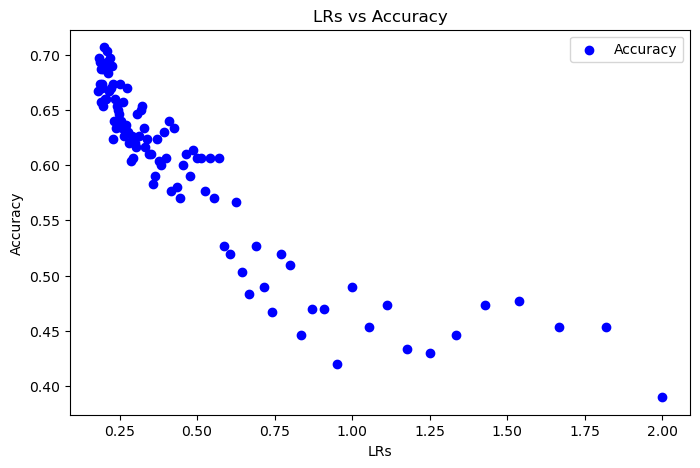

In [18]:
X,y = spiral_data(samples=100, classes=3)
layer1 = Dense(2,64)
activation_layer_1 = activateReLu()

layer2 = Dense(64,3)
loss_activation = Softmax_Categorical_Loss()
optim = Optimizer_GD(learning_rate=2.0,decay=1e-3,momen=0.09)

lrs = []
accuracies = []
for epoch in range (10001):
    layer1.forward_prop(X)
    activation_layer_1.forward_pass(layer1.output)
    
    layer2.forward_prop(activation_layer_1.output)
    
    loss = loss_activation.forward_prop(layer2.output,y)
    
    # print("### Results before forward propagation ###")
    # print(loss_activation.output[:5])
    
    
    
    preds = np.argmax(loss_activation.output, axis=1)
    # print(preds)
    if len(y.shape) == 2:
        y = np.argmax(y,axis=1)
    # print(y)
    
    acc = np.mean(preds == y)
    # print("Accuracy : ", acc)
    if not epoch %100:
        print(f'epoch: {epoch}, ' +
              f'acc: {acc:.3f}, ' +
              f'loss: {loss:.3f},' +
             f'lr: {optim.curr_learning_rate}')
        lrs.append(optim.curr_learning_rate)
        accuracies.append(acc)
    loss_activation.backward_prop(loss_activation.output,y)
    layer2.backward_prop(loss_activation.dinputs)
    activation_layer_1.backward_pass(layer2.dinputs)
    layer1.backward_prop(activation_layer_1.dinputs)

    optim.pre_update_params()
    optim.update_params(layer1)
    optim.update_params(layer2)
    optim.post_update_params()
# print("### Results before backward propagation ###")
# Print gradients
# print(layer1.dweights)
# print(layer1.dbiases)
# print(layer2.dweights)
# print(layer2.dbiases)

plt.figure(figsize=(8, 5))
plt.scatter(lrs, accuracies, color='blue', label='Accuracy')
plt.xlabel('LRs')
plt.ylabel('Accuracy')
plt.title('LRs vs Accuracy')
plt.legend()
plt.show()

### Adagrad Optimizer ###

In [19]:
class Optimizer_Adagrad:
    def __init__(self,learning_rate=0.0, decay=0., epsilion=0.09):
        self.learning_rate = learning_rate
        self.curr_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilion = epsilion

    def pre_update_params(self):
        if self.decay:
            self.curr_learning_rate = self.learning_rate * (1.0/1.0+(self.decay*self.iterations))

    def update_params(self,layer):
        if not hasattr(layer,'weights_cache'):
            layer.weights_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.bias)

        layer.weights_cache += layer.dweights**2
        layer.bias_cache += layer.dbiases**2

        layer.weights += -self.curr_learning_rate*layer.dweights/(np.sqrt(layer.weights_cache+self.epsilion))
        layer.bias += -self.curr_learning_rate*layer.dbiases/(np.sqrt(layer.bias_cache+self.epsilion))

    def post_update_params(self):
        self.iterations +=1

epoch: 0, acc: 0.360, loss: 1.099,lr: 1.0
epoch: 100, acc: 0.427, loss: 1.073,lr: 1.099
epoch: 200, acc: 0.427, loss: 1.063,lr: 1.199
epoch: 300, acc: 0.427, loss: 1.051,lr: 1.299
epoch: 400, acc: 0.473, loss: 0.992,lr: 1.399
epoch: 500, acc: 0.420, loss: 0.941,lr: 1.499
epoch: 600, acc: 0.537, loss: 0.918,lr: 1.599
epoch: 700, acc: 0.567, loss: 0.854,lr: 1.699
epoch: 800, acc: 0.550, loss: 0.855,lr: 1.799
epoch: 900, acc: 0.610, loss: 0.760,lr: 1.899
epoch: 1000, acc: 0.593, loss: 0.782,lr: 1.999
epoch: 1100, acc: 0.673, loss: 0.700,lr: 2.099
epoch: 1200, acc: 0.703, loss: 0.639,lr: 2.199
epoch: 1300, acc: 0.633, loss: 0.704,lr: 2.299
epoch: 1400, acc: 0.673, loss: 0.673,lr: 2.399
epoch: 1500, acc: 0.670, loss: 0.666,lr: 2.499
epoch: 1600, acc: 0.770, loss: 0.537,lr: 2.599
epoch: 1700, acc: 0.717, loss: 0.583,lr: 2.699
epoch: 1800, acc: 0.767, loss: 0.535,lr: 2.799
epoch: 1900, acc: 0.750, loss: 0.561,lr: 2.899
epoch: 2000, acc: 0.767, loss: 0.514,lr: 2.999
epoch: 2100, acc: 0.807, lo

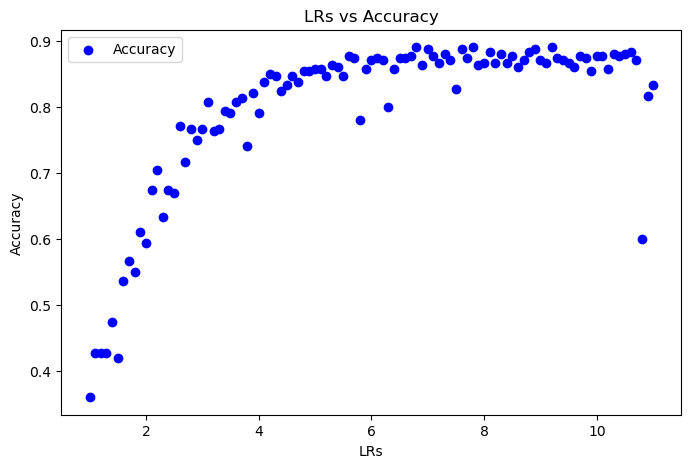

In [20]:
X,y = spiral_data(samples=100, classes=3)
layer1 = Dense(2,64)
activation_layer_1 = activateReLu()

layer2 = Dense(64,3)
loss_activation = Softmax_Categorical_Loss()
optim = Optimizer_Adagrad(learning_rate=1.0,decay=1e-3)

lrs = []
accuracies = []
for epoch in range (10001):
    layer1.forward_prop(X)
    activation_layer_1.forward_pass(layer1.output)
    
    layer2.forward_prop(activation_layer_1.output)
    
    loss = loss_activation.forward_prop(layer2.output,y)
    
    # print("### Results before forward propagation ###")
    # print(loss_activation.output[:5])
    
    
    
    preds = np.argmax(loss_activation.output, axis=1)
    # print(preds)
    if len(y.shape) == 2:
        y = np.argmax(y,axis=1)
    # print(y)
    
    acc = np.mean(preds == y)
    # print("Accuracy : ", acc)
    if not epoch %100:
        print(f'epoch: {epoch}, ' +
              f'acc: {acc:.3f}, ' +
              f'loss: {loss:.3f},' +
             f'lr: {optim.curr_learning_rate}')
        lrs.append(optim.curr_learning_rate)
        accuracies.append(acc)
    loss_activation.backward_prop(loss_activation.output,y)
    layer2.backward_prop(loss_activation.dinputs)
    activation_layer_1.backward_pass(layer2.dinputs)
    layer1.backward_prop(activation_layer_1.dinputs)

    optim.pre_update_params()
    optim.update_params(layer1)
    optim.update_params(layer2)
    optim.post_update_params()
# print("### Results before backward propagation ###")
# Print gradients
# print(layer1.dweights)
# print(layer1.dbiases)
# print(layer2.dweights)
# print(layer2.dbiases)

plt.figure(figsize=(8, 5))
plt.scatter(lrs, accuracies, color='blue', label='Accuracy')
plt.xlabel('LRs')
plt.ylabel('Accuracy')
plt.title('LRs vs Accuracy')
plt.legend()
plt.show()

### RMSProp Optimizer ###

In [25]:
class Optimizer_RMSProp:
    def __init__(self,learning_rate=0.0, decay=0., epsilion=0.09, rho= 0.5):
        self.learning_rate = learning_rate
        self.curr_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.rho = rho
        self.epsilion = epsilion

    def pre_update_params(self):
        if self.decay:
            self.curr_learning_rate = self.learning_rate * (1.0/1.0+(self.decay*self.iterations))

    def update_params(self,layer):
        if not hasattr(layer,'weights_cache'):
            layer.weights_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.bias)

        layer.weights_cache = self.rho*layer.weights_cache + (1-self.rho)*layer.dweights**2
        layer.bias_cache = self.rho*layer.bias_cache + (1-self.rho)*layer.dbiases**2

        layer.weights += -self.curr_learning_rate*layer.dweights/(np.sqrt(layer.weights_cache+self.epsilion))
        layer.bias += -self.curr_learning_rate*layer.dbiases/(np.sqrt(layer.bias_cache+self.epsilion))

    def post_update_params(self):
        self.iterations +=1

epoch: 0, acc: 0.370, loss: 1.099,lr: 1.0
epoch: 100, acc: 0.417, loss: 1.048,lr: 1.099
epoch: 200, acc: 0.400, loss: 1.029,lr: 1.199
epoch: 300, acc: 0.417, loss: 1.013,lr: 1.299
epoch: 400, acc: 0.453, loss: 1.023,lr: 1.399
epoch: 500, acc: 0.463, loss: 0.960,lr: 1.499
epoch: 600, acc: 0.507, loss: 0.912,lr: 1.599
epoch: 700, acc: 0.523, loss: 0.902,lr: 1.699
epoch: 800, acc: 0.487, loss: 0.939,lr: 1.799
epoch: 900, acc: 0.557, loss: 0.856,lr: 1.899
epoch: 1000, acc: 0.610, loss: 0.789,lr: 1.999
epoch: 1100, acc: 0.540, loss: 0.870,lr: 2.099
epoch: 1200, acc: 0.587, loss: 0.824,lr: 2.199
epoch: 1300, acc: 0.607, loss: 0.876,lr: 2.299
epoch: 1400, acc: 0.517, loss: 0.865,lr: 2.399
epoch: 1500, acc: 0.447, loss: 0.926,lr: 2.499
epoch: 1600, acc: 0.500, loss: 0.907,lr: 2.599
epoch: 1700, acc: 0.503, loss: 0.907,lr: 2.699
epoch: 1800, acc: 0.477, loss: 0.945,lr: 2.799
epoch: 1900, acc: 0.493, loss: 1.006,lr: 2.899
epoch: 2000, acc: 0.493, loss: 1.005,lr: 2.999
epoch: 2100, acc: 0.513, lo

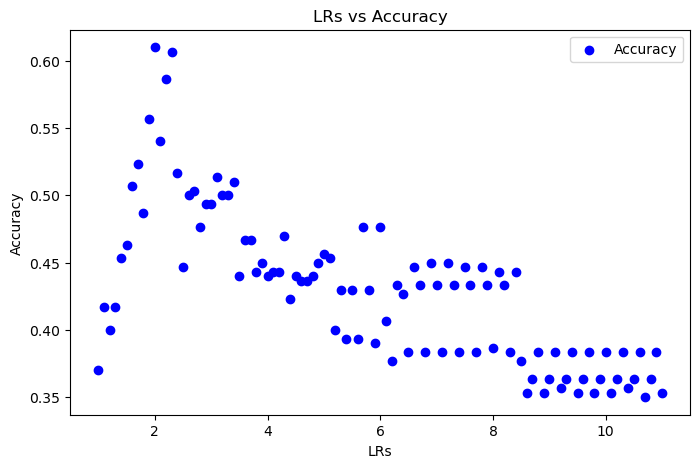

In [26]:
X,y = spiral_data(samples=100, classes=3)
layer1 = Dense(2,64)
activation_layer_1 = activateReLu()

layer2 = Dense(64,3)
loss_activation = Softmax_Categorical_Loss()
optim = Optimizer_RMSProp(learning_rate=1.0,decay=1e-3)

lrs = []
accuracies = []
for epoch in range (10001):
    layer1.forward_prop(X)
    activation_layer_1.forward_pass(layer1.output)
    
    layer2.forward_prop(activation_layer_1.output)
    
    loss = loss_activation.forward_prop(layer2.output,y)
    
    # print("### Results before forward propagation ###")
    # print(loss_activation.output[:5])
    
    
    
    preds = np.argmax(loss_activation.output, axis=1)
    # print(preds)
    if len(y.shape) == 2:
        y = np.argmax(y,axis=1)
    # print(y)
    
    acc = np.mean(preds == y)
    # print("Accuracy : ", acc)
    if not epoch %100:
        print(f'epoch: {epoch}, ' +
              f'acc: {acc:.3f}, ' +
              f'loss: {loss:.3f},' +
             f'lr: {optim.curr_learning_rate}')
        lrs.append(optim.curr_learning_rate)
        accuracies.append(acc)
    loss_activation.backward_prop(loss_activation.output,y)
    layer2.backward_prop(loss_activation.dinputs)
    activation_layer_1.backward_pass(layer2.dinputs)
    layer1.backward_prop(activation_layer_1.dinputs)

    optim.pre_update_params()
    optim.update_params(layer1)
    optim.update_params(layer2)
    optim.post_update_params()
# print("### Results before backward propagation ###")
# Print gradients
# print(layer1.dweights)
# print(layer1.dbiases)
# print(layer2.dweights)
# print(layer2.dbiases)

plt.figure(figsize=(8, 5))
plt.scatter(lrs, accuracies, color='blue', label='Accuracy')
plt.xlabel('LRs')
plt.ylabel('Accuracy')
plt.title('LRs vs Accuracy')
plt.legend()
plt.show()

### ADAM Optimizer ###

In [37]:
class Optimizer_Adam:
    def __init__(self,learning_rate=0., decay=0.,momen=0.,epsilion=0.09,beta_1=0.09, beta_2=0.009):
        self.learning_rate = learning_rate
        self.curr_learning_rate = learning_rate
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.decay = decay
        self.momen = momen
        self.epsilion = epsilion
        self.iterations = 0

    def pre_update_params(self):
        if self.decay:
            self.curr_learning_rate = self.learning_rate * (1.0/(1.0+self.decay*self.iterations))

    def update_params(self,layer):
        if not hasattr(layer,'weights_cache'):
            layer.weights_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.bias)
            layer.weights_momentums = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.bias)

        layer.weights_momentums = self.beta_1*layer.weights_momentums + (1-self.beta_1)*layer.dweights
        layer.bias_momentums = self.beta_1*layer.bias_momentums + (1-self.beta_1)*layer.dbiases

        layer.weights_cache = self.beta_2*layer.weights_cache + (1-self.beta_2)*layer.dweights**2
        layer.bias_cache = self.beta_2*layer.bias_cache + (1-self.beta_2)*layer.dbiases**2

        weight_momens = layer.weights_momentums/(1-self.beta_1**(self.iterations+1))
        bias_momens = layer.bias_momentums/(1-self.beta_1**(self.iterations+1))


        weight_cac = layer.weights_cache/(1-self.beta_2**(self.iterations+1))
        bias_cac = layer.bias_cache/(1-self.beta_2**(self.iterations+1))

        layer.weights += -self.curr_learning_rate* (weight_momens/(np.sqrt(weight_cac)+ self.epsilion))
        layer.bias += -self.curr_learning_rate* (bias_momens/(np.sqrt(bias_cac)+ self.epsilion))

    def post_update_params(self):
        self.iterations += 1

epoch: 0, acc: 0.380, loss: 1.099,lr: 1.0
epoch: 100, acc: 0.403, loss: 0.997,lr: 0.9099181073703367
epoch: 200, acc: 0.527, loss: 0.945,lr: 0.8340283569641367
epoch: 300, acc: 0.523, loss: 0.875,lr: 0.7698229407236336
epoch: 400, acc: 0.557, loss: 0.832,lr: 0.7147962830593281
epoch: 500, acc: 0.620, loss: 0.745,lr: 0.66711140760507
epoch: 600, acc: 0.623, loss: 0.739,lr: 0.6253908692933083
epoch: 700, acc: 0.670, loss: 0.646,lr: 0.5885815185403178
epoch: 800, acc: 0.660, loss: 0.630,lr: 0.5558643690939411
epoch: 900, acc: 0.707, loss: 0.583,lr: 0.526592943654555
epoch: 1000, acc: 0.670, loss: 0.588,lr: 0.5002501250625312
epoch: 1100, acc: 0.680, loss: 0.570,lr: 0.4764173415912339
epoch: 1200, acc: 0.697, loss: 0.554,lr: 0.45475216007276037
epoch: 1300, acc: 0.703, loss: 0.541,lr: 0.43497172683775553
epoch: 1400, acc: 0.710, loss: 0.532,lr: 0.4168403501458941
epoch: 1500, acc: 0.730, loss: 0.522,lr: 0.4001600640256102
epoch: 1600, acc: 0.737, loss: 0.515,lr: 0.3847633705271258
epoch: 1

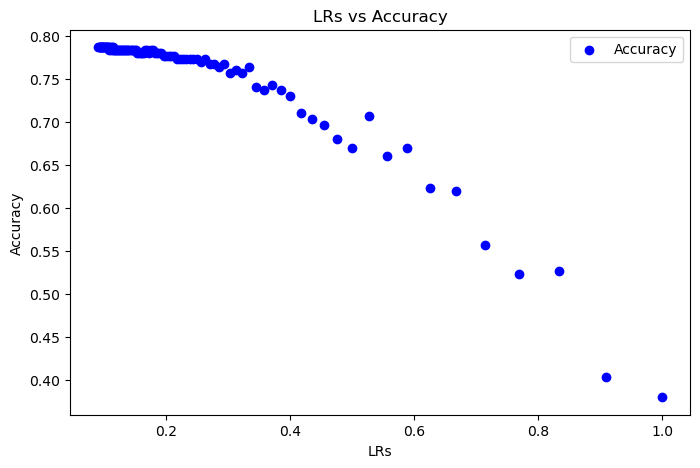

In [38]:
X,y = spiral_data(samples=100, classes=3)
layer1 = Dense(2,64)
activation_layer_1 = activateReLu()

layer2 = Dense(64,3)
loss_activation = Softmax_Categorical_Loss()
optim = Optimizer_Adam(learning_rate=1.0,decay=1e-3)

lrs = []
accuracies = []
for epoch in range (10001):
    layer1.forward_prop(X)
    activation_layer_1.forward_pass(layer1.output)
    
    layer2.forward_prop(activation_layer_1.output)
    
    loss = loss_activation.forward_prop(layer2.output,y)
    
    # print("### Results before forward propagation ###")
    # print(loss_activation.output[:5])
    
    
    
    preds = np.argmax(loss_activation.output, axis=1)
    # print(preds)
    if len(y.shape) == 2:
        y = np.argmax(y,axis=1)
    # print(y)
    
    acc = np.mean(preds == y)
    # print("Accuracy : ", acc)
    if not epoch %100:
        print(f'epoch: {epoch}, ' +
              f'acc: {acc:.3f}, ' +
              f'loss: {loss:.3f},' +
             f'lr: {optim.curr_learning_rate}')
        lrs.append(optim.curr_learning_rate)
        accuracies.append(acc)
    loss_activation.backward_prop(loss_activation.output,y)
    layer2.backward_prop(loss_activation.dinputs)
    activation_layer_1.backward_pass(layer2.dinputs)
    layer1.backward_prop(activation_layer_1.dinputs)

    optim.pre_update_params()
    optim.update_params(layer1)
    optim.update_params(layer2)
    optim.post_update_params()
# print("### Results before backward propagation ###")
# Print gradients
# print(layer1.dweights)
# print(layer1.dbiases)
# print(layer2.dweights)
# print(layer2.dbiases)

plt.figure(figsize=(8, 5))
plt.scatter(lrs, accuracies, color='blue', label='Accuracy')
plt.xlabel('LRs')
plt.ylabel('Accuracy')
plt.title('LRs vs Accuracy')
plt.legend()
plt.show()

### Testing Data ###

In [40]:
X_test, y_test = spiral_data(classes=3, samples=100)
layer1.forward_prop(X_test)
activation_layer_1.forward_pass(layer1.output)
layer2.forward_prop(activation_layer_1.output)
loss = loss_activation.forward_prop(layer2.output, y_test)

preds = np.argmax(loss_activation.output, axis=1)
if (y_test.shape == 2):
    y_test = np.argmax(y_test,axis=1)

accuracy = np.mean(preds == y_test)
print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

validation, acc: 0.730, loss: 0.821
